In [ ]:
# for Importing the Dataset
import pandas as pd

In [ ]:
# lets read the dataset
df = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')
# lets check the shape of the dataset
df.shape

(3150, 5)

In [ ]:
# lets check the head of the dataset
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# cleaning the texts
# importing the libraries for Natural Language Processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Cleaning the Data

corpus = []

for i in range(0, 3150):
    # Handle potential non-string values
    review = str(df['verified_reviews'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)  ## Removing all Unecessary items
    review = review.lower()                                         ## Converting into Lower Case
    review = review.split()
    ps = PorterStemmer()                                            ## Stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]  ## Removing Stopwords
    review = ' '.join(review)
    corpus.append(review)

## Bag of Words
convert string to numirecal

In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray() #all text in corpus convert from str to arr
y = data.iloc[:, 4].values #target values it will have values 0,1

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


## TF-IDF

In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)

x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500, ngram_range=(2, 2)) # to use trigrams ngram_range=(3, 3))

x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500, ngram_range=(2, 2)) #to use trigrams ngram_range = (3, 3)

x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.svm import SVC


In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm.predict(x_test)
from sklearn.metrics import accuracy_score
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9206349206349206


## Niev Bias

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()  # For continuous features

# Train the model
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7396825396825397


SVM best than niev bias

In [ ]:
!pip install textblob
from textblob import TextBlob

# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    # Handle potential numeric values
    if isinstance(text, str):
        textblob = TextBlob(text.encode('utf-8').decode('utf-8')) # Decode after encoding to handle potential non-ascii characters
        pol = textblob.sentiment.polarity
        return pol
    else:
        return None # Or any default value for non-string reviews

# lets apply the function
df['polarity'] = df['verified_reviews'].apply(get_polarity)

In [ ]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text)) # Convert to string directly
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)

## Visulization

<ipython-input-49-0fd56982aea2>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['polarity'])  # Use 'df' here
<ipython-input-49-0fd56982aea2>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['subjectivity'])


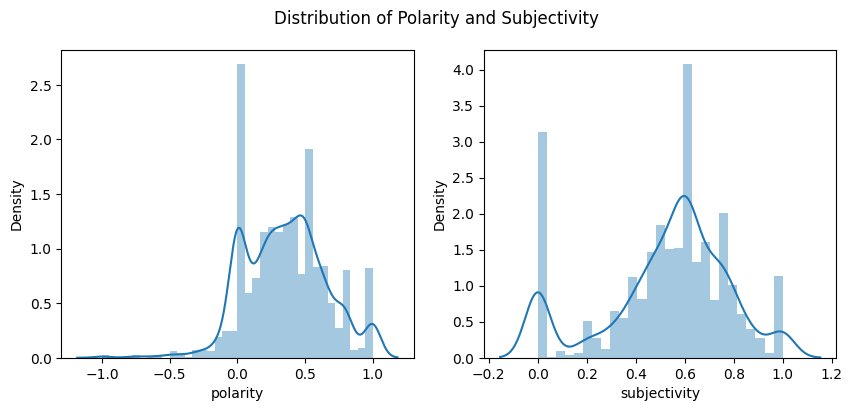

<ipython-input-49-0fd56982aea2>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['subjectivity'])


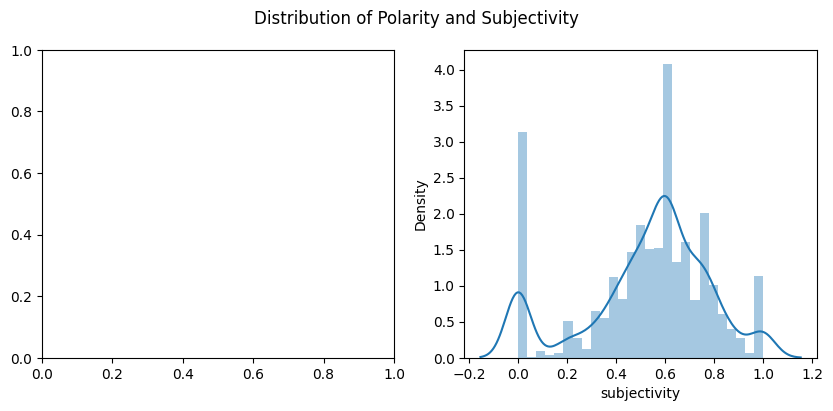

In [ ]:
## Visualizing Polarity and Subjectivity
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 4)
# Make sure you've run the code to calculate polarity
# and it's in the correct DataFrame:

# ... (Your code to calculate polarity for 'df')

# If 'data' and 'df' are supposed to be the same, use 'df' consistently:
plt.subplot(1, 2, 1)
sns.distplot(df['polarity'])  # Use 'df' here

plt.subplot(1, 2, 2)
# Assuming 'subjectivity' was calculated for 'data'
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

plt.subplot(1, 2, 1)
#sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()